# 1. Introduction to Natural Language Processing
Natural Language Processing is certainly one of the most fascinating and exciting areas to be involved with at this point in time. It is a wonderful intersection of computer science, artificial intelligence, machine learning and linguistics. With the (somewhat) recent rise of Deep Learning, Natural Language Processing currently has a great deal of buzz surrounding it, and for good reason. The goal of this post is to do three things:

1. Inspire the reader with the beauty of the problem of NLP
2. Explain how machine learning techniques (i.e. something as simple as Logistic Regression) can be applied to text data.
3. Prepare the reader for the next sections surrounding Deep Learning as it is applied to NLP.

Before we dive in, I would like to share the poem _Jabberwocky_ by Lewis Carrol, and an accompanying excerpt from the book "_Godel, Escher, Bach_", by Douglas Hofstadter.

<img src="https://drive.google.com/uc?id=1ROLVf2p6xYyTqQ3fmeky0eSD6ZCdfJ3M" width="300">

And now, the corresponding excerpt, _**Translations of Jabberwocky**_. 

> ### Translations of Jabberwocky<br>
Douglas R. Hofstadter
Imagine native speakers of English, French, and German, all of whom have excellent command of their respective native languages, and all of whom enjoy wordplay in their own language. Would their symbol networks be similar on a local level, or on a global level? Or is it meaningful to ask such a question? The question becomes concrete when you look at the preceding translations of Lewis Carroll's famous "Jabberwocky".
<br>
<br>
[The "preceding translations" were "Jabberwocky" (English, original), by Lewis Carroll, "Le Jaseroque", (French), by Frank L. Warrin, and "Der Jammerwoch" (German), by Robert Scott. --kl]
<br>
<br>
I chose this example because it demonstrates, perhaps better than an example in ordinary prose, the problem of trying to find "the same node" in two different networks which are, on some level of analysis, extremely nonisomorphic. In ordinary language, the task of translation is more straightforward, since to each word or phrase in the original language, there can usually be found a corresponding word or phrase in the new language. By contrast, in a poem of this type, many "words" do not carry ordinary meaning, but act purely as exciters of nearby symbols. However, what is nearby in one language may be remote in another.
<br>
<br>
Thus, in the brain of a native speaker of English, "slithy" probably activates such symbols as "slimy", "slither", "slippery", "lithe", and "sly", to varying extents. Does "lubricilleux" do the corresponding thing in the brain of a Frenchman? What indeed would be "the corresponding thing"? Would it be to activate symbols which are the ordinary translations of those words? What if there is no word, real or fabricated, which will accomplish that? Or what if a word does exist, but it is very intellectual-sounding and Latinate ("lubricilleux"), rather than earthy and Anglo-Saxon ("slithy")? Perhaps "huilasse" would be better than "lubricilleux"? Or does the Latin origin of the word "lubricilleux" not make itself felt to a speaker of French in the way that it would if it were an English word ("lubricilious", perhaps)?
<br>
<br>
An interesting feature of the translation into French is the transposition into the present tense. To keep it in the past would make some unnatural turns of phrase necessary, and the present tense has a much fresher flavour in French than in the past. The translator sensed that this would be "more appropriate"--in some ill-defined yet compelling sense--and made the switch. Who can say whether remaining faithful to the English tense would have been better?
<br>
<br>
In the German version, the droll phrase "er an-zu-denken-fing" occurs; it does not correspond to any English original. It is a playful reversal of words, whose flavour vaguely resembles that of the English phrase "he out-to-ponder set", if I may hazard a reverse translation. Most likely this funny turnabout of words was inspired by the similar playful reversal in the English of one line earlier: "So rested he by the Tumtum tree". It corresponds, yet doesn't correspond.
<br>
<br>
Incidentally, why did the Tumtum tree get changed into an "arbre Té-té" in French? Figure it out for yourself.
<br>
<br>
The word "manxome" in the original, whose "x" imbues it with many rich overtones, is weakly rendered in German by "manchsam", which back-translates into English as "maniful". The French "manscant" also lacks the manifold overtones of "manxome". There is no end to the interest of this kind of translation task.
<br>
<br>
When confronted with such an example, one realizes that it is utterly impossible to make an exact translation. Yet even in this pathologically difficult case of translation, there seems to be some rough equivalence obtainable. Why is this so, if there really is no isomorphism between the brains of people who will read the different versions? The answer is that there is a kind of rough isomorphism, partly global, partly local, between the brains of all the readers of these three poems.


Now, the purpose of sharing the above is because if you are reading these posts (and are anything like me), you may very well spend a large chunk of your time studying mathematics, computer science, machine learning, writing code, and so on. But, if you are new to NLP the appreciation for the beauty and deeper meaning surrounding language may not be on the forefront of your mind-that is understandable! But hopefully the passage and commentary above ignited some interest in the wonderfully complex and worthwhile problem of Natural Language Processing and Understanding.

## 2. Spam Detection
Now, especially at first, I don't want to dive into phonemes, morphemes, syntactical structure, and the like. We will leave those linguistic concepts for later on. The goal here is to quickly allow someone with an understanding of basic machine learning algorithms and techniques to implement them in the domain of NLP. 

We will see that, at least at first, a lot of NLP deals with preprocessing data, which allows us to use algorithms that we already know. The question that most definitely arises is: How do we take a bunch of documents which are basically a bunch of text, and feed them into other machine learning algorithms where the input is usually a vector of numbers? 

Well, before we even get to that, let's take a preprocessed data set from the [uci archive](https://archive.ics.uci.edu/ml/datasets/Spambase) and perform a simple classification on it. The data has been processed in such a way that we can consider columns 1-48 to the be the input, and column 49 to the be label (1 = spam, 0 = not spam). 

The input columns are considered the input, and they are a **word frequency measure**. This measure can be calculated via:

$$\text{Word Frequency Measure} = \frac{\text{# of times word appears in a document}}{\text{Number of words in document}} * 100$$

This will result in a **Document Term matrix**, which is a matrix where _terms_ (words that appeared in the document) go along the columns, and _documents_ (emails in this case) go along the rows:

|       |word 1|word 2|word 3|word 4|word 5|word 6|word 7|word 8|
|-------|------|------|------|------|------|------|------|------|
|Email 1|||||||||
|Email 2|||||||||
|Email 3|||||||||
|Email 4|||||||||
|Email 5|||||||||

### 2.1 Implementation in Code
We will now use `Scikit Learn` to show that we can use _any_ model on NLP data, as long as it has been preprocessed correctly. First, let's use scikit learns `NaiveBayes` classifier:

In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../../data/nlp/spambase.data')
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [3]:
data = data.values
np.random.shuffle(data)    # randomly split data into train and test sets

X = data[:, :48]
Y = data[:, -1]

Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]

model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print ("Classifcation Rate for NB: ", model.score(Xtest, Ytest))

Classifcation Rate for NB:  0.87


Excellent, a classification rate of 92%! Let's now look utilize `AdaBoost`:

In [4]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(Xtrain, Ytrain)
print ("Classifcation Rate for Adaboost: ", model.score(Xtest, Ytest))

Classifcation Rate for Adaboost:  0.94


Great, a nice improvement, but more importantly, we have shown that we can take text data and that via correct preprocessing we are able to utilize it with standard machine learning API's. The next step is to dig into _how_ basic preprocessing is performed.

---

# 3. Sentiment Analysis
To go through the basic preprocessing steps that are frequently used when performing machine learning on text data (often referred to an NLP pipeline) we are going to want to work on the problem of **sentiment analysis**. Sentiment is a measure of how positive or negative something is, and we are going to build a very simple sentiment analyzer to predict the sentiment of Amazon reviews. These are reviews, so they come with 5 star ratings, and we are going to look at the electronics category in particular. These are XML files, so we will need an XML parser. 

### 3.1 NLP Terminology 
Before we begin, I would just like to quickly go over some basic NLP terminology that will come up frequently throughout this post.
* **Corpus**: Collection of text
* **Tokens**: Words and punctuation that make up the corpus. 
* **Type**: a distinct token. Ex. "Run, Lola Run" has four tokens (comma counts as one) and 3 types.
* **Vocabulary**: The set of all types. 
* The google corpus (collection of text) has 1 trillion tokens, and only 13 million types. English only has 1 million dictionary words, but the google corpus includes types such as "www.facebook.com". 

### 3.2 Problem Overview
Now, we are just going to be looking at the electronics category. We could use the 5 star targets to do regression, but instead we will just do classification since they are already marked "positive" and "negative". As I mentioned, we are going to be working with XML data, so we will need an XML parser, for which we will use `BeautifulSoup`. We will only look at the `review_text` attribute. To create our feature vector, we will count up the number of occurences of each word, and divided it by the total number of words. However, for that to work we will need two passes through the data:

1. One to collect the total number of distinct words, so that we know the size of our feature vector, in other words the vocabulary size, and possibly remove stop words like "this", "is", "I", "to", etc, to decrease the vocabulary size. The goal here is to know the index of each token
2. On the second pass, we will be able to assign values to each data vector whose index corresponds to which words, and one to create data vectors 

Once we have that, it is simply a matter of creating a classifier like the one we did for our spam detector! Here, we will use logistic regression, so we can intepret the weights! For example, if you see a word like horrible and it has a weight of minus 1, it is associated with negative reviews. With that started, let's begin!

## 3.3 Sentiment Analysis in Code

In [5]:
import nltk
import numpy as np

from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from bs4 import BeautifulSoup

wordnet_lemmatizer = WordNetLemmatizer()                                # this turns words into their base form 

stopwords = set(w.rstrip() for w in open('../../data/nlp/stopwords.txt'))         # grab stop words 

# get pos reviews
# only want rev text
positive_reviews = BeautifulSoup(open('../../data/nlp/electronics/positive.review').read(), "lxml") 
positive_reviews = positive_reviews.findAll('review_text')                                  

negative_reviews = BeautifulSoup(open('../../data/nlp/electronics/negative.review').read(), "lxml")
negative_reviews = negative_reviews.findAll('review_text')

### 3.3.1 Class Imbalance
There are more positive than negative reviews, so we are going to shuffle the positive reviews and then cut off any extra that we may have so that they are both the same size.

In [6]:
np.random.shuffle(positive_reviews)
positive_reviews = positive_reviews[:len(negative_reviews)]

### 3.3.2 Tokenizer function
Lets now create a tokenizer function that can be used on our specific reviews.

In [7]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)                        # essentially string.split()
    tokens = [t for t in tokens if len(t) > 2]                     # get rid of short words
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]     # get words to base form
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

### 3.3.3 Index each word
We now need to create an index for each of the words, so that each word has an index in the final data vector. However, to able able to do that we need to know the size of the final data vector, and to be able to know that we need to know how big the vocabulary is. Remember, the **vocabulary** is just the set of all types!

We are essentially going to look at every individual review, tokenize them, and then add those tokens 1 by 1 to the map if they do not exist yet.

In [8]:
word_index_map = {}                            # our vocabulary - dictionary that will map words to dictionaries
current_index = 0                              # counter increases whenever we see a new word

positive_tokenized = []
negative_tokenized = []

# --------- loop through positive reviews ---------
for review in positive_reviews:              
    tokens = my_tokenizer(review.text)          # converts single review into array of tokens (split function)
    positive_tokenized.append(tokens)
    for token in tokens:                        # loops through array of tokens for specific review
        if token not in word_index_map:                        # if the token is not in the map, add it
            word_index_map[token] = current_index          
            current_index += 1                                 # increment current index
                
# --------- loop through negative reviews ---------
for review in negative_reviews:              
    tokens = my_tokenizer(review.text)          
    negative_tokenized.append(tokens)
    for token in tokens:                       
        if token not in word_index_map:                        
            word_index_map[token] = current_index          
            current_index += 1   

And we can actually take a look at the contents of `word_index_map` by making use of the `random` module (part of the Python Standard Library):

In [9]:
import random
print(dict(random.sample(word_index_map.items(), 20)))

{'tech-savvy': 5921, 'downloads': 2029, 're-acquire': 9930, 'megapixels': 7066, 'dual-amping': 6499, 'unsupported': 10981, 'configuration': 1183, '6000': 3246, 'obviously..': 9627, 'didn': 10133, 'eligible': 2440, 'lawn': 748, '50-pack': 1002, 'yearly..': 10956, '192.168.1.245': 2607, 'glad': 1844, 'occasionally': 1631, 'floppy': 7170, 'criminal': 4786, 'emptying': 4382}


In [10]:
print('Vocabulary Size', len(word_index_map))

Vocabulary Size 11088


### 3.3.4 Convert tokens into vector
Now that we have our tokens and vocabulary, we need to convert our tokens into a vector. Because we are going to shuffle our train and test sets again, we are going to want to put labels and vector into same array for now since it makes it easier to shuffle. 

Note, this function operates on **one** review. So the +1 is creating our label, and this function is basically designed to take our input vector from an english form to a numeric vector form.

In [11]:
def tokens_to_vector(tokens, label):
    xy_data = np.zeros(len(word_index_map) + 1)          # equal to the vocab size + 1 for the label 
    for t in tokens:                                     # loop through every token
        i = word_index_map[t]                            # get index from word index map
        xy_data[i] += 1                                  # increment data at that index 
    xy_data = xy_data / xy_data.sum()                    # divide entire array by total, so they add to 1
    xy_data[-1] = label                                  # set last element to label
    return xy_data

Time to actually assign these tokens to vectors.

In [12]:
N = len(positive_tokenized) + len(negative_tokenized)               # total number of examples 
data = np.zeros((N, len(word_index_map) + 1))                       # N examples x vocab size + 1 for label
i = 0                                                               # counter to keep track of sample

for tokens in positive_tokenized:                                   # loop through postive tokenized reviews
    xy = tokens_to_vector(tokens, 1)                                # passing in 1 because these are pos reviews
    data[i,:] = xy                                                  # set data row to that of the input vector
    i += 1                                                          # increment 1
    
for tokens in negative_tokenized:                                   
    xy = tokens_to_vector(tokens, 0)                                
    data[i,:] = xy                                                 
    i += 1         

In [13]:
print(data.shape)

(2000, 11089)


Our data is now 1000 rows of positively labeled reviews, followed by 1000 rows of negatively labeled reviews. We have `11089` columns, which is one more than our vocabulary size because we have a column for the label (positive or negative). Lets shuffle before getting our train and test set.

In [14]:
np.random.shuffle(data)
X = data[:, :-1]
Y = data[:, -1]

Xtrain = X[:-100,]
Ytrain = Y[:-100,]
Xtest = X[-100:,]
Ytest = Y[-100:,]


model = LogisticRegression()
model.fit(Xtrain, Ytrain)
print("Classification Rate: ", model.score(Xtest, Ytest))

Classification Rate:  0.7


### 3.3.5 Classification Rate
We end up with a classification rate of 0.71, which is not ideal, but it is better than random guessing. 

### 3.3.6 Sentiment Analysis
Something interesting that we can do is look at the weights of each word, to see if that word has positive or negative sentiment. 

In [15]:
threshold = 0.7 
large_magnitude_weights = []
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold or weight < -threshold:
      large_magnitude_weights.append((word, weight))

def sort_by_magnitude(sentiment_dict):
    return sentiment_dict[1]
  
large_magnitude_weights.sort(reverse=True, key=sort_by_magnitude)
print(large_magnitude_weights)

[('price', 2.808163204024058), ('easy', 1.7646511704661152), ('quality', 1.3716522244882545), ('excellent', 1.319811182219224), ('love', 1.237745876552362), ('you', 1.155006377913112), ('perfect', 1.0324004425098248), ('sound', 0.9780126530219685), ('highly', 0.9778749978617105), ('memory', 0.9398953342479317), ('little', 0.9262682823592787), ('fast', 0.905207610856845), ('speaker', 0.8965845758701319), ('ha', 0.8111001120921802), ('pretty', 0.7764302324793534), ('cable', 0.7712191036378001), ("'ve", 0.7170298751638035), ('week', -0.7194449455694366), ('returned', -0.7482471935264389), ('bad', -0.7542948554985326), ('poor', -0.7555447694156194), ('tried', -0.7892866982929136), ('buy', -0.8504195601103998), ('month', -0.8771148641617261), ('support', -0.9163137326943319), ('waste', -0.946863186564699), ('item', -0.9518247418299971), ('money', -1.1086664158434432), ('return', -1.1512973579906935), ('then', -1.2084513223482118), ('doe', -1.2197007105871698), ('wa', -1.6630639259918825), (

Clearly the above list is not perfect, _but_ it should give some insight on what is possible for us already. The logistic regression model was able to pick out `easy`, `quality`, and `excellent` as words that correlate to a positive response, and it was able to find `poor`, `returned`, and `waste` as words the correlate to a negative response. 

---

# 4. NLTK Exploration 
Before we move on any further, I wanted to take a minute to go over a few of the most useful tools for the `nltk` (Natural Language Toolkit) library. This library will encapsulate many NLP tasks for us.

### 4.1 Parts of Speech (POS) Tagging
Parts of speech tagging is meant to do just what it sound like: tag each word with a given part of speech within a document. For example, in the following sentence:

> "Bob is great."

`Bob` is a noun, `is` is a verb, and `great` is an adjective. We can utilize `nltk`'s POS tagger on that sentence and see the same result:

In [16]:
import nltk
nltk.pos_tag("Bob is great".split())

[('Bob', 'NNP'), ('is', 'VBZ'), ('great', 'JJ')]

In [17]:
nltk.pos_tag("Machine learning is great".split())

[('Machine', 'NN'), ('learning', 'NN'), ('is', 'VBZ'), ('great', 'JJ')]

The second entry in the above tuples `NN`, `VBZ`, etc, represents the determined tag of the word. For a description of each tag, check out [this link](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). 

### 4.2 Stemming and Lemmatization
Both the process of **stemming** and **lemmatization** are used in reducing words to a "base" form. This is very useful because a vocabulary can get very large, while certain words tend to have the same meaning. For example _dog_ and _dogs_, and _jump_ and _jumping_ both have similar meanings. The main difference between stemming and lemmatization is that stemming is a bit more basic. 

In [18]:
porter_stemmer = nltk.stem.porter.PorterStemmer()
print(porter_stemmer.stem('dogs'))

dog


In [19]:
print(porter_stemmer.stem('wolves'))

wolv


In [20]:
lemmatizer = nltk.stem.WordNetLemmatizer()
print(lemmatizer.lemmatize('dogs'))

dog


In [21]:
print(lemmatizer.lemmatize('wolves'))

wolf


Both the stemmer and lemmatizer managed to get `dogs` correct, but only the lemmatizer managed to correctly convert `wolves` to base form. 

### 4.3 Named Entity Recognition 
Finally there is **Named Entity** recognition. Entities refer to nouns such as:
* "Albert Einstein" - a person
* "Apple" - an organization

In [22]:
s = "Albert Einstein was born on March 14, 1879"
tags = nltk.pos_tag(s.split())
print(tags)

[('Albert', 'NNP'), ('Einstein', 'NNP'), ('was', 'VBD'), ('born', 'VBN'), ('on', 'IN'), ('March', 'NNP'), ('14,', 'CD'), ('1879', 'CD')]


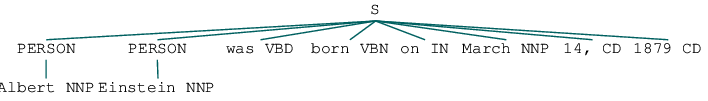

In [23]:
nltk.ne_chunk(tags)

In [24]:
s = "Steve Jobs was the CEO of Apple Corp."
tags = nltk.pos_tag(s.split())
print(tags)

[('Steve', 'NNP'), ('Jobs', 'NNP'), ('was', 'VBD'), ('the', 'DT'), ('CEO', 'NNP'), ('of', 'IN'), ('Apple', 'NNP'), ('Corp.', 'NNP')]


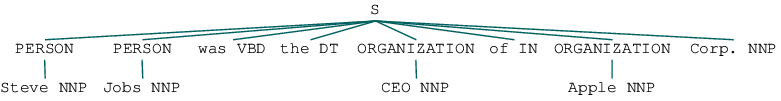

In [25]:
nltk.ne_chunk(tags)

---

# 5. Latent Semantic Analysis
We will now take a moment to extend our semantic analysis example from before, instead now performing **Latent Semantic Analysis**. Latent semantic analysis is utilized to deal with the reality that we will often have _multiple_ words with the _same_ meaning, or on the other hand, _one_ word with _multiple_ meanings. These are referred to as _synonomy_ and _polysemy_ respectively. 

In the case of synonyms here are a few basic examples:
* "Buy" and "Purchase"
* "Big" and "Large"
* "Quick" and "Speedy"

And in the case of polysemes:
* "Man" (man as in human, and man as in a male opposed to a female)
* "Milk" (can be a noun or a verb)

In order to solve this problem, we will need to introduce _Latent Variables_.

## 5.1 Latent Variables
The easiest way to get your head around latent variables at first is via an example. Consider the words "computer", "laptop", and "PC"; these words are most likely seen together very often, meaning they are highly correlated. We can thinking a _latent_ or _hidden_ variable that is below representing them all, and we can call that $z$. We can mathematically define $z$ as:

$$z = 0.7*computer \; + 0.5*PC \; + 0.6*laptop$$

So, we now have an idea of what a latent variable is, but what is the job of Latent Semantic Analysis? The entire goal of LSA is:

1. To find the latent/hidden variables.
2. Then, transform original data into these new variables. 

Ideally, after the above has been performed, the dimensionality of the new data will be much smaller than that of the original data set. It is important to note that LSA definitely helps solve the synonomy problem, by combining correlated variables. However, there are conflicting view points about whether or not it helps with polysemy. 

## 5.2 The Math Behind LSA
As we just discussed, the main goal when applying LSA is to deal with synonyms. For example, "small" and "little" would each make up their own unique variable, but in reality we know that they mean the same thing, so that is redundant. We could combine them into a single variable, reducing the dimensionality of our data set by one. So, to be clear the goal of LSA is:

> **Goal of LSA**: Reduce redundancy.

### 5.2.1 Redundancy in Numbers
Now, machine learning at its core is always dealing with numbers, so what exactly do I mean by redundancy from a numerical standpoint? Take a look at the the plot below:

<img src="https://drive.google.com/uc?id=1GK0COCtvumKXTI0nB0qHB_e696p2IE_J" width="300">

We can see clearly that there is a linear relationship between the dependent and independent variable. In other words, there is a linear relationship between lean body mass and muscle strength. So, we could say that one of these variables is redundant; if we know someones lean body mass, we can accurately predict their muscle strength, and vice versa. If we want a compact representation of attributes related to someones athletic performance, then we may only need to know one of these variables, since the other can be predicted from it. This advantage becomes more apparent as our dimensionality grows; if we could go from 1 million variables down to variables, that is a 200,000x's savings of space! Saving space is good, and hence reducing redundancy is good! 

Now the math behind LSA is rather complex and involves a good deal of linear algebra, and to be honest it would slightly bloat this notebook if I placed it here. Because of this, I have decided to move it to my mathematics section under linear algebra. With that said, LSA is essentially just the application of **Singular Value Decomposition** (SVD) to a term document matrix. I highly encourage you to go over my notebook explaining SVD and PCA before continuing, to have a better understanding of how the underlying mechanics work in the code we are about to implement. 

Now, we can begin by gaining a brief bit of intuition behind what LSA may look like in code. As usual, we are going to begin with an input matrix `X` of shape $NxD$, where $N$ is the number of samples and $D$ is the number of features. This will be passed into scikit learns svd model, `TruncatedSVD`, call the `fit`, `transform` function, and finally receive an output matrix `Z` of shape $Nx2$, or $Nxd$, where $d << D$. 

```
model = TruncatedSVD()
model.fit(X)
Z = model.transform(X)
# equivalent: Z = model.fit_transform(X)
```

## 5.3 LSA in Code

In [26]:
import nltk 
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

### Process:
* we start by pulling in all of the titles, and all of the stop words. Our titles will look like:
```
['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',...]
```
* we then define our tokenizer which will convert our list of strings into specific tokens, which will look like:
```
[['philosophy', 'sex', 'love', 'reader'],
 ['reading', 'judaism', 'christianity', 'islam'],
 ['microprocessor', 'principle'],
 ['bernhard', 'edouard', 'fernow', 'story', 'north', 'american', 'forestry'],
 ['encyclopedia', 'buddhism'],
```
* we then create our input matrix. This is going to be D x N, where D is the length of the total number of terms we are using (input features, 2070) and where N is the length of all tokens (2373, the total number of titles)
* This is essentially the transpose of how our input matrix is generally setup. Usually we have our examples along the rows, and our input features along the columns, however, in NLP it is sometimes the opposite
* we then loop through all tokens, and create a vector for each one (essentially, if a word occurs, its value in the vector is incremented by 1)
* the final input matrix is fed into the SVD, where the X matrix is transformed into a Z matrix of only 2 dimensions

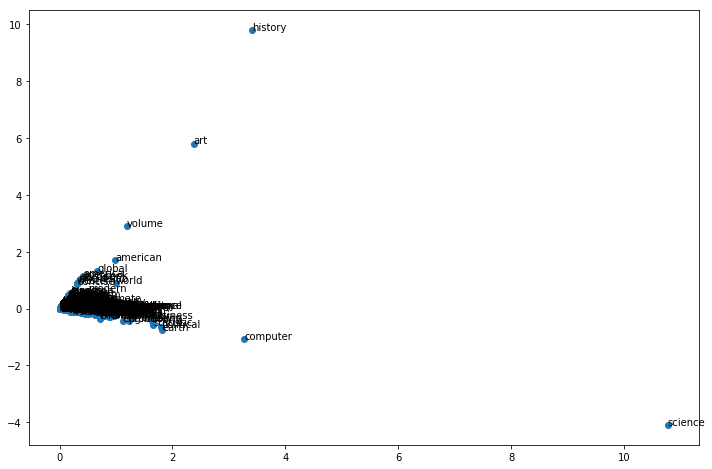

In [27]:
wordnet_lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open('../../data/nlp/all_book_titles.txt')]       # Load all book titles in to an array

stopwords = set(w.rstrip() for w in open('../../data/nlp/stopwords.txt'))             # loading stop words (irrelevant)
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })                                    # adding additional stop words 
 

def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)                        # essentially string.split()
    tokens = [t for t in tokens if len(t) > 2]                     # get rid of short words
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]     # get words to base form
    tokens = [t for t in tokens if t not in stopwords]             # remove stop words
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]  # get rid of any token that includes a number
    return tokens

# Lets now figure out the index of each word, by going through the entire vocabularly 
# create a word-to-index map so that we can create our word-frequency vectors later
# let's also save the tokenized versions so we don't have to tokenize again later
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
error_count = 0

for title in titles:
    try:
        title = title.encode('ascii', 'ignore').decode('utf-8') # this will throw exception if bad characters
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)
        print(title)
        error_count += 1  
         
# now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x


N = len(all_tokens)     # nested list, has 2373 total entries, each which has several words
D = len(word_index_map) # total number of words that we are working with (2070)
X = np.zeros((D, N))    # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1

def main():
    fig, ax = plt.subplots(figsize=(12,8))
    svd = TruncatedSVD()
    Z = svd.fit_transform(X)
    plt.scatter(Z[:,0], Z[:,1])
    for i in range(D):
        plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
    plt.show()

if __name__ == '__main__':
    main()


## Keep in mind...
What is important to remember here is that the main point of this process is to take a bunch of words (2070) be able to plot their relationship to eachother in a 2-d surface. To do this, their use in 2373 book titles are considered, and SVD is performed. 